In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import datetime

In [3]:
fut1m_df = pd.read_csv('data/minute_bar_data26022022/data/VN30F1M-20220226.csv')
fut2m_df = pd.read_csv('data/minute_bar_data26022022/data/VN30F2M-20220226.csv')

In [4]:
fut1m_df.head(3)

,SYMBOL,TRADING_DATE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,VOLUME,BUY_VOLUME,SELL_VOLUME
0,VN30F1M,20171106 08:59:59,841000,841000,841000,841000,1,1,0
1,VN30F1M,20171106 09:00:51,841000,841700,840600,840600,253,243,10
2,VN30F1M,20171106 09:01:48,841000,841000,840700,841000,43,35,8


In [5]:
fut1m_df.tail(3)

,SYMBOL,TRADING_DATE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,VOLUME,BUY_VOLUME,SELL_VOLUME
260368,VN30F1M,20220225 14:29:59,1518400,1519000,1518200,1519000,917,439,478
260369,VN30F1M,20220225 14:30:04,1518500,1518500,1518500,1518500,47,47,0
260370,VN30F1M,20220225 14:45:17,1517000,1517000,1517000,1517000,4355,4355,0


In [6]:
fut2m_df.head(3)

,SYMBOL,TRADING_DATE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,VOLUME,BUY_VOLUME,SELL_VOLUME
0,VN30F2M,20171106 09:00:03,844000,844000,844000,844000,4,0,4
1,VN30F2M,20171106 09:04:56,844000,844000,844000,844000,3,3,0
2,VN30F2M,20171106 09:07:49,843300,843300,843200,843200,6,0,6


In [7]:
fut2m_df.tail(3)

,SYMBOL,TRADING_DATE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,CLOSE_PRICE,VOLUME,BUY_VOLUME,SELL_VOLUME
156617,VN30F2M,20220225 14:27:55,1516500,1516500,1516500,1516500,1,1,0
156618,VN30F2M,20220225 14:29:36,1516800,1516800,1516100,1516100,5,4,1
156619,VN30F2M,20220225 14:45:17,1513900,1513900,1513900,1513900,20,20,0


In [8]:
fut1m_df = fut1m_df.rename(columns={"TRADING_DATE": "timestamp", 
                                    "OPEN_PRICE": "open", "HIGH_PRICE": "high", "LOW_PRICE": "low", "CLOSE_PRICE": "close", 
                                    "VOLUME": "volume", "BUY_VOLUME": "buy_volume", "SELL_VOLUME": "sell_volume"})
fut2m_df = fut2m_df.rename(columns={"TRADING_DATE": "timestamp", 
                                    "OPEN_PRICE": "open", "HIGH_PRICE": "high", "LOW_PRICE": "low", "CLOSE_PRICE": "close", 
                                    "VOLUME": "volume", "BUY_VOLUME": "buy_volume", "SELL_VOLUME": "sell_volume"})

### data process

In [9]:
fut1m_df = fut1m_df[['timestamp','open','high','low','close','volume','buy_volume','sell_volume']]
fut1m_df = fut1m_df.set_index('timestamp')
fut1m_df.index = pd.to_datetime(fut1m_df.index)

In [10]:
fut2m_df = fut2m_df[['timestamp','open','high','low','close','volume','buy_volume','sell_volume']]
fut2m_df = fut2m_df.set_index('timestamp')
fut2m_df.index = pd.to_datetime(fut2m_df.index)

In [11]:
# fut1m_df['date'] = fut1m_df['TRADING_DATE_'].apply(lambda x: x.date())
# fut1m_df['date'] = fut1m_df['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))
# fut1m_df['time'] = fut1m_df['TRADING_DATE_'].apply(lambda x: x.time())

# fut2m_df['date'] = fut2m_df['TRADING_DATE_'].apply(lambda x: x.date())
# fut2m_df['date'] = fut2m_df['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))
# fut2m_df['time'] = fut2m_df['TRADING_DATE_'].apply(lambda x: x.time())
# fut2m_df['hhmm'] = fut2m_df['TRADING_DATE_'].apply(lambda x: x.hour * 100 + x.minute)

In [12]:
fut1m_df

,open,high,low,close,volume,buy_volume,sell_volume
timestamp,,,,,,,
2017-11-06 08:59:59,841000,841000,841000,841000,1,1,0
2017-11-06 09:00:51,841000,841700,840600,840600,253,243,10
2017-11-06 09:01:48,841000,841000,840700,841000,43,35,8
2017-11-06 09:02:57,841100,841500,841100,841500,37,15,22
2017-11-06 09:03:54,841600,842000,841600,842000,56,36,20
...,...,...,...,...,...,...,...
2022-02-25 14:27:59,1518500,1518500,1518100,1518500,1115,800,315
2022-02-25 14:28:58,1518000,1518500,1518000,1518500,494,195,299
2022-02-25 14:29:59,1518400,1519000,1518200,1519000,917,439,478


* resample to 30 minute bar

In [13]:
fut1m_df_ = fut1m_df.resample('30Min', closed='right', label='right').agg(
            {'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 
             'volume': 'sum', 'buy_volume': 'sum', 'sell_volume': 'sum'})

In [14]:
fut2m_df_ = fut2m_df.resample('30Min', closed='right', label='right').agg(
            {'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 
             'volume': 'sum', 'buy_volume': 'sum', 'sell_volume': 'sum'})

In [15]:
fut1m_df_ = fut1m_df_.dropna()
fut2m_df_ = fut2m_df_.dropna()

In [16]:
fut1m_df_.to_csv('fut1m_df_30min.csv')

In [17]:
fut1m_df_ = fut1m_df_.reset_index()
fut2m_df_ = fut2m_df_.reset_index()

In [18]:
fut1m_df_['date'] = fut1m_df_['timestamp'].apply(lambda x: x.date())

In [19]:
day_of_week_v = [x.weekday() for x in np.unique(fut1m_df_['date'].values)]
day_of_week_v = np.array(day_of_week_v)

In [20]:
fut1m_df_['date'] = fut1m_df_['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))
fut1m_df_['time'] = fut1m_df_['timestamp'].apply(lambda x: x.time())

fut2m_df_['date'] = fut2m_df_['timestamp'].apply(lambda x: x.date())
fut2m_df_['date'] = fut2m_df_['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))
fut2m_df_['time'] = fut2m_df_['timestamp'].apply(lambda x: x.time())

In [21]:
fut1m_df_['hhmm'] = fut1m_df_['time'].apply(lambda x: x.hour * 100 + x.minute)
fut2m_df_['hhmm'] = fut2m_df_['time'].apply(lambda x: x.hour * 100 + x.minute)

In [22]:
fut1m_df['date'] = fut1m_df.index.map(lambda x: x.date())
fut1m_df['date'] = fut1m_df['date'].map(lambda x: int(x.year * 1e4 + x.month * 1e2 + x.day))

In [23]:
fut1m_df_['hhmm'].value_counts()

1430    1076
1030    1076
1500    1076
1100    1076
1330    1076
1130    1076
930     1076
1400    1076
1000    1076
1200    1040
1300       6
900        5
Name: hhmm, dtype: int64

In [24]:
fut1m_df_.loc[fut1m_df_['hhmm']==1200]

,timestamp,open,high,low,close,volume,buy_volume,sell_volume,date,time,hhmm
16,2017-11-07 12:00:00,849300.0,849300.0,849300.0,849300.0,4,0,4,20171107,12:00:00,1200
26,2017-11-08 12:00:00,850100.0,850100.0,850100.0,850100.0,38,38,0,20171108,12:00:00,1200
36,2017-11-09 12:00:00,860300.0,860300.0,860300.0,860300.0,9,0,9,20171109,12:00:00,1200
46,2017-11-10 12:00:00,858400.0,858400.0,858400.0,858400.0,21,0,21,20171110,12:00:00,1200
74,2017-11-15 12:00:00,874500.0,874500.0,874500.0,874500.0,1,1,0,20171115,12:00:00,1200
...,...,...,...,...,...,...,...,...,...,...,...
10690,2022-02-21 12:00:00,1525600.0,1525600.0,1525600.0,1525600.0,7,7,0,20220221,12:00:00,1200
10700,2022-02-22 12:00:00,1507200.0,1507300.0,1506900.0,1507300.0,60,24,36,20220222,12:00:00,1200
10710,2022-02-23 12:00:00,1532200.0,1532200.0,1532100.0,1532100.0,46,39,7,20220223,12:00:00,1200
10720,2022-02-24 12:00:00,1512500.0,1512500.0,1512500.0,1512500.0,25,25,0,20220224,12:00:00,1200


In [25]:
for t in [900, 930, 1000, 1030, 1100, 1130, 1200, 1230, 1300, 1330, 1400, 1430, 1500]:
    print('processing for time: ', t)
    print(fut1m_df_.loc[fut1m_df_['hhmm']==t]['volume'].median())

processing for time:  900
578.0
processing for time:  930
11307.5
processing for time:  1000
10159.0
processing for time:  1030
9750.0
processing for time:  1100
10833.5
processing for time:  1130
12047.5
processing for time:  1200
54.0
processing for time:  1230
nan
processing for time:  1300
1.0
processing for time:  1330
13979.5
processing for time:  1400
16653.5
processing for time:  1430
20243.0
processing for time:  1500
3953.0


In [26]:
valid_time = [930, 1000, 1030, 1100, 1130, 1330, 1400, 1430, 1500]

In [27]:
fut1m_filt_df = fut1m_df_.loc[fut1m_df_['hhmm'].isin(valid_time)]
fut2m_filt_df = fut2m_df_.loc[fut2m_df_['hhmm'].isin(valid_time)]

In [28]:
print(fut1m_df_.shape)
print(fut1m_filt_df.shape)
print(fut2m_df_.shape)
print(fut2m_filt_df.shape)

(10735, 11)
(9684, 11)
(9874, 11)
(9656, 11)


In [29]:
dates_v = np.unique(fut1m_filt_df['date'].values)

In [30]:
dates_v

array([20171106, 20171107, 20171108, ..., 20220223, 20220224, 20220225],
      dtype=int64)

In [31]:
valid_time_v = np.array(valid_time)

In [32]:
valid_time_v

array([ 930, 1000, 1030, 1100, 1130, 1330, 1400, 1430, 1500])

### ALPHA BACKTEST

In [33]:
import imp
import tsOp
imp.reload(tsOp)

<module 'tsOp' from 'C:\\Users\\user\\Documents\\Work\\Personal Investment\\vn\\tsOp.py'>

In [34]:
open_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'open')
high_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'high')
low_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'low')
close_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'close')
total_volume_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'volume')
buy_volume_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'buy_volume')
sell_volume_df = fut1m_filt_df.pivot(index = 'date', columns = 'hhmm', values = 'sell_volume')

In [35]:
close_df

hhmm,930,1000,1030,1100,1130,1330,1400,1430,1500
date,,,,,,,,,
20171106,842000.0,841200.0,839300.0,842400.0,842200.0,842000.0,843900.0,844800.0,845000.0
20171107,845700.0,846600.0,847300.0,848200.0,849300.0,848300.0,847000.0,847000.0,847000.0
20171108,849200.0,849900.0,850500.0,850400.0,850200.0,851900.0,853500.0,856500.0,857000.0
20171109,858200.0,857400.0,859600.0,859600.0,860200.0,858000.0,857100.0,857700.0,857300.0
20171110,857400.0,858000.0,858800.0,858800.0,858200.0,859700.0,859500.0,857900.0,857300.0
...,...,...,...,...,...,...,...,...,...
20220221,1523800.0,1525200.0,1524300.0,1521900.0,1525700.0,1529000.0,1528000.0,1530000.0,1530000.0
20220222,1517500.0,1516900.0,1516000.0,1509300.0,1506600.0,1507000.0,1504500.0,1516600.0,1517500.0
20220223,1526700.0,1528700.0,1530000.0,1532100.0,1532700.0,1532100.0,1530100.0,1529600.0,1529300.0


In [36]:
dates_v

array([20171106, 20171107, 20171108, ..., 20220223, 20220224, 20220225],
      dtype=int64)

In [37]:
day_of_week_v

array([0, 1, 2, ..., 2, 3, 4])

In [38]:
ret_df = close_df[1500] / close_df[1500].shift(1) - 1

In [39]:
ret_v1 = ret_df.values
ret_v2 = ret_df.shift(1).values

In [40]:
np.corrcoef(ret_v1[2:], ret_v2[2:])

array([[ 1.       , -0.1240533],
       [-0.1240533,  1.       ]])

* Idea 1: check intraday return from ytd close to a certain time today and follow the trend, then get out at close

Signal time:  930
IR =  -0.07243215451369553
Mean Return (bps) =  -8.962405466901041


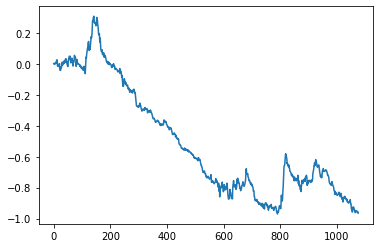

Signal time:  1000
IR =  -0.06748325871962071
Mean Return (bps) =  -7.819449817688451


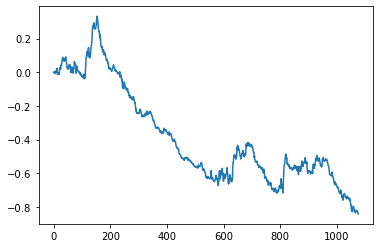

Signal time:  1030
IR =  -0.07500230669351858
Mean Return (bps) =  -8.198820318900164


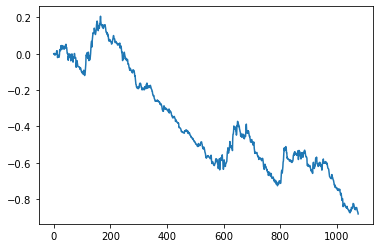

Signal time:  1100
IR =  -0.12208189324365336
Mean Return (bps) =  -12.480478928573392


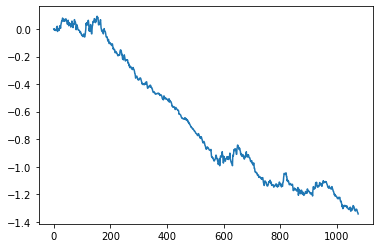

Signal time:  1130
IR =  -0.20138019750830455
Mean Return (bps) =  -17.92071201163543


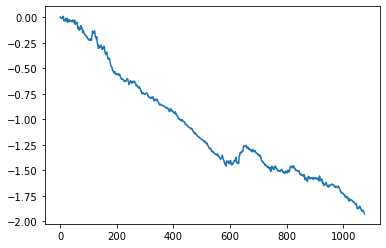

Signal time:  1330
IR =  -0.2084103186413044
Mean Return (bps) =  -14.905141928509059


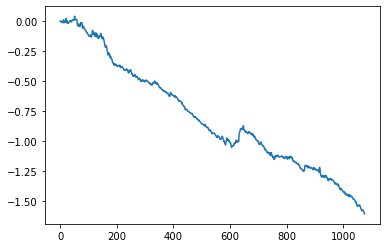

Signal time:  1400
IR =  -0.5501433872121061
Mean Return (bps) =  -22.221707909007645


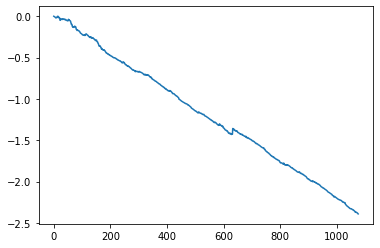

In [41]:
for signal_time in [930, 1000, 1030, 1100, 1130, 1330, 1400]:
    print('Signal time: ', signal_time)
    signal_return_df = close_df[signal_time]/ close_df[1500].shift(1) - 1
    alpha_df = np.sign(signal_return_df)
    idx = valid_time.index(signal_time)
    trade_time = valid_time[idx + 1]
    realized_return_df = close_df[1500]/ close_df[trade_time] - 1
    
    trading_cost = 0.0025
    pnl_df = alpha_df * realized_return_df - np.fabs(alpha_df) * trading_cost

    pnl_v = pnl_df.values
    pnl_v[~np.isfinite(pnl_v)] = 0
    print('IR = ', np.nanmean(pnl_v)/ np.nanstd(pnl_v))
    print('Mean Return (bps) = ', np.nanmean(pnl_v) * 1e4)
    plt.plot(np.cumsum(pnl_v))
    plt.show()

IR =  -0.06748325871962071
Mean Return (bps) =  -7.819449817688451


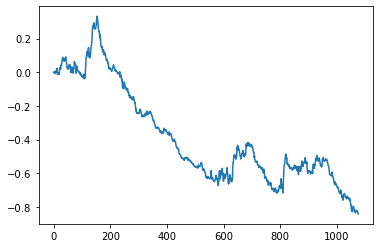

In [60]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ close_df[1500].shift(1) - 1
alpha_df = np.sign(signal_return_df)
idx = valid_time.index(signal_time)
trade_time = valid_time[idx + 1]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1

trading_cost = 0.0025
pnl_df = alpha_df * realized_return_df - np.fabs(alpha_df) * trading_cost

pnl_v = pnl_df.values
pnl_v[~np.isfinite(pnl_v)] = 0
print('IR = ', np.nanmean(pnl_v)/ np.nanstd(pnl_v))
print('Mean Return (bps) = ', np.nanmean(pnl_v) * 1e4)
plt.plot(np.cumsum(pnl_v))
plt.show()

In [61]:
print('Monday median return (in bps): ', np.median(pnl_v[day_of_week_v == 0]) * 1e4)
print('Monday median return (in bps): ', np.median(pnl_v[day_of_week_v == 1]) * 1e4)
print('Monday median return (in bps): ', np.median(pnl_v[day_of_week_v == 2]) * 1e4)
print('Monday median return (in bps): ', np.median(pnl_v[day_of_week_v == 3]) * 1e4)
print('Monday median return (in bps): ', np.median(pnl_v[day_of_week_v == 4]) * 1e4)

Monday median return (in bps):  5.438091096858243
Monday median return (in bps):  -18.20421338769971
Monday median return (in bps):  -23.854130858255697
Monday median return (in bps):  -11.218992733650879
Monday median return (in bps):  -22.974632639594628


IR =  0.061088735580582074
Mean Return (bps) =  3.508495372056675


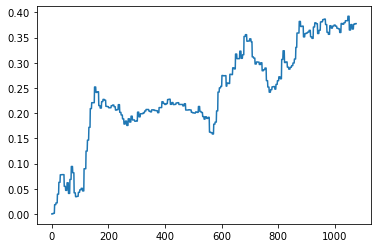

In [95]:
signal_time = 1000
signal_return_df = close_df[signal_time]/ close_df[1500].shift(1) - 1
alpha_v = np.sign(signal_return_df).values
alpha_v[day_of_week_v > 0] = 0
idx = valid_time.index(signal_time)
trade_time = valid_time[idx + 1]
realized_return_df = close_df[1500]/ close_df[trade_time] - 1

trading_cost = 0.0025
pnl_v = alpha_v * realized_return_df.values - np.fabs(alpha_v) * trading_cost
pnl_v[~np.isfinite(pnl_v)] = 0
print('IR = ', np.nanmean(pnl_v)/ np.nanstd(pnl_v))
print('Mean Return (bps) = ', np.nanmean(pnl_v) * 1e4)
plt.plot(np.cumsum(pnl_v))
plt.show()

* only trade when intraday return is strong compared to historical

Signal time:  930
Num of lookback days:  20
Z score threshold:  0.5
Trading freq (%) =  50.65055762081785
IR =  -0.06674885320116897
Mean Return (bps) =  -6.315148992330111


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


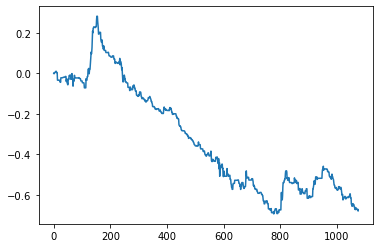

Signal time:  930
Num of lookback days:  20
Z score threshold:  0.75
Trading freq (%) =  36.98884758364313
IR =  -0.022782801740570856
Mean Return (bps) =  -1.9258477807970222


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


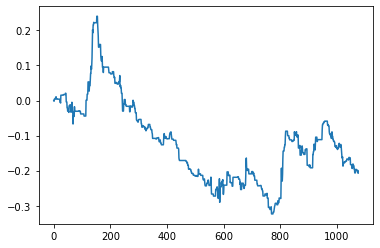

Signal time:  930
Num of lookback days:  20
Z score threshold:  1
Trading freq (%) =  26.022304832713754
IR =  -0.009216027586561605
Mean Return (bps) =  -0.6823177486516439


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


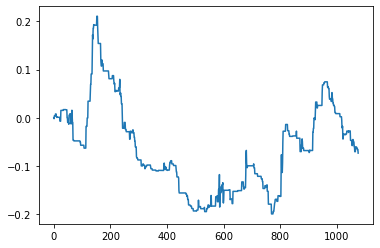

Signal time:  930
Num of lookback days:  20
Z score threshold:  1.25
Trading freq (%) =  18.401486988847584
IR =  -0.009840484894702422
Mean Return (bps) =  -0.6409693593343865


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


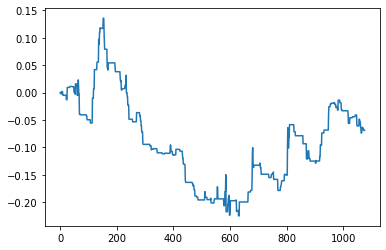

Signal time:  930
Num of lookback days:  20
Z score threshold:  1.5
Trading freq (%) =  13.475836431226766
IR =  -0.0006085235924141943
Mean Return (bps) =  -0.03617168356515578


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


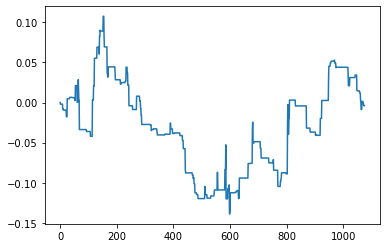

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  930
Num of lookback days:  60
Z score threshold:  0.5
Trading freq (%) =  45.91078066914498
IR =  -0.0523647187960461
Mean Return (bps) =  -4.89692839137715


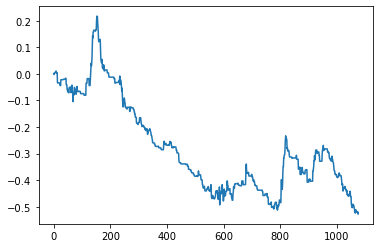

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  930
Num of lookback days:  60
Z score threshold:  0.75
Trading freq (%) =  32.806691449814124
IR =  -0.03533920897331439
Mean Return (bps) =  -2.7911990381747818


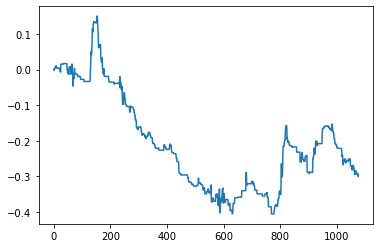

Signal time:  930
Num of lookback days:  60
Z score threshold:  1
Trading freq (%) =  22.02602230483271
IR =  -0.008787943762438072
Mean Return (bps) =  -0.621580863461178


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


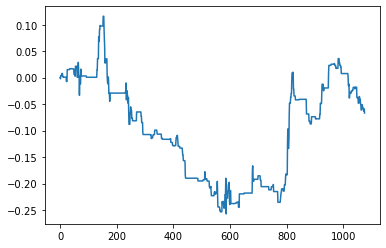

Signal time:  930
Num of lookback days:  60
Z score threshold:  1.25
Trading freq (%) =  16.171003717472118
IR =  -0.00029368207596178306
Mean Return (bps) =  -0.019066417579861432


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


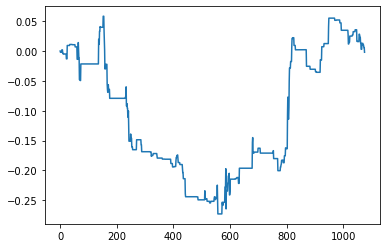

Signal time:  930
Num of lookback days:  60
Z score threshold:  1.5
Trading freq (%) =  11.71003717472119
IR =  -0.010864462559431421
Mean Return (bps) =  -0.6095317674943871


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


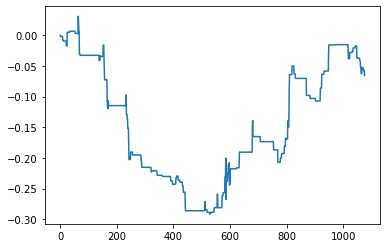

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  930
Num of lookback days:  120
Z score threshold:  0.5
Trading freq (%) =  42.56505576208178
IR =  -0.061282196066502787
Mean Return (bps) =  -5.402461109706312


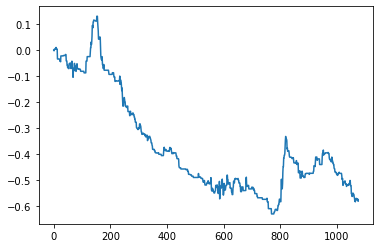

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  930
Num of lookback days:  120
Z score threshold:  0.75
Trading freq (%) =  28.99628252788104
IR =  -0.03074070100113349
Mean Return (bps) =  -2.3686897174730164


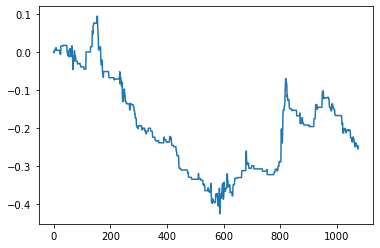

Signal time:  930
Num of lookback days:  120
Z score threshold:  1
Trading freq (%) =  19.60966542750929
IR =  -0.014616257120031447
Mean Return (bps) =  -0.9890643416426841


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


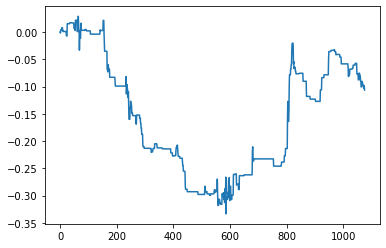

Signal time:  930
Num of lookback days:  120
Z score threshold:  1.25
Trading freq (%) =  13.940520446096654
IR =  -0.022183121424134016
Mean Return (bps) =  -1.317090736087157


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


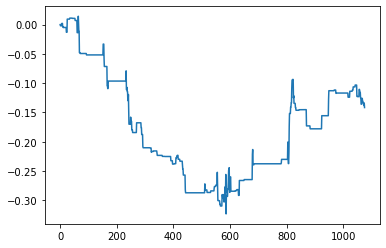

Signal time:  930
Num of lookback days:  120
Z score threshold:  1.5
Trading freq (%) =  9.944237918215613
IR =  -0.0007482893664202197
Mean Return (bps) =  -0.041543020607313345


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


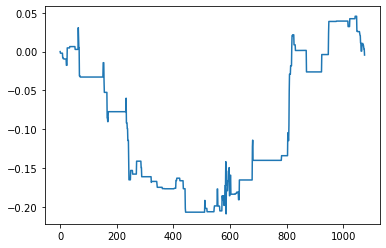

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  930
Num of lookback days:  250
Z score threshold:  0.5
Trading freq (%) =  37.174721189591075
IR =  -0.05346315062434043
Mean Return (bps) =  -4.463978761393027


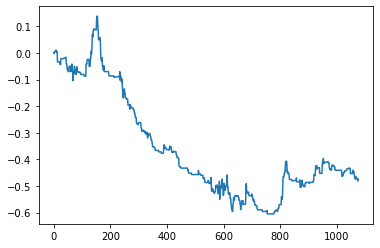

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  930
Num of lookback days:  250
Z score threshold:  0.75
Trading freq (%) =  24.349442379182157
IR =  -0.030500739419655896
Mean Return (bps) =  -2.1751328386651796


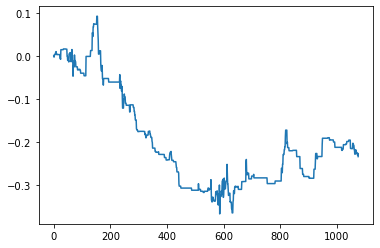

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  930
Num of lookback days:  250
Z score threshold:  1
Trading freq (%) =  16.635687732342006
IR =  -0.01797556589698965
Mean Return (bps) =  -1.1041063539243645


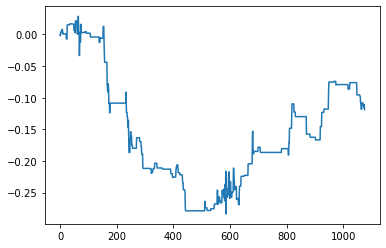

Signal time:  930
Num of lookback days:  250
Z score threshold:  1.25
Trading freq (%) =  11.617100371747211
IR =  -0.016239465097237227
Mean Return (bps) =  -0.9052332420308963


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


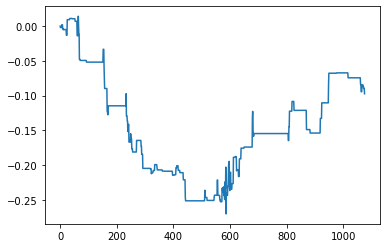

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  930
Num of lookback days:  250
Z score threshold:  1.5
Trading freq (%) =  7.992565055762081
IR =  -0.015257666198559446
Mean Return (bps) =  -0.7887458624832787


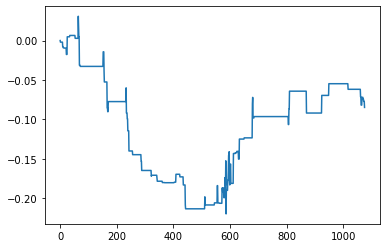

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1000
Num of lookback days:  20
Z score threshold:  0.5
Trading freq (%) =  53.159851301115246
IR =  -0.0371787495084912
Mean Return (bps) =  -3.34329653505215


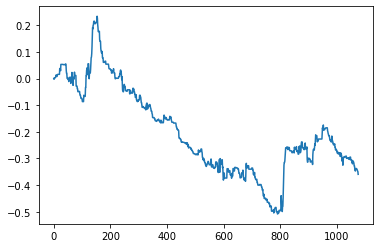

Signal time:  1000
Num of lookback days:  20
Z score threshold:  0.75
Trading freq (%) =  39.12639405204461
IR =  -0.00709863048498903
Mean Return (bps) =  -0.5749413869287363


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


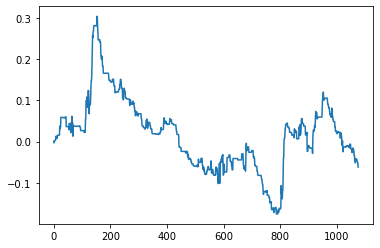

Signal time:  1000
Num of lookback days:  20
Z score threshold:  1
Trading freq (%) =  26.95167286245353
IR =  0.002469285576448681
Mean Return (bps) =  0.17111202670712491


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


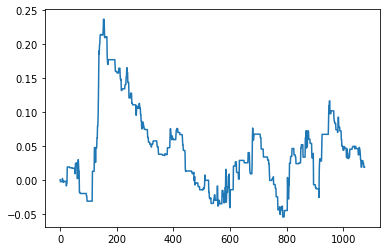

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1000
Num of lookback days:  20
Z score threshold:  1.25
Trading freq (%) =  18.680297397769515
IR =  0.006663407762882337
Mean Return (bps) =  0.38924297013089404


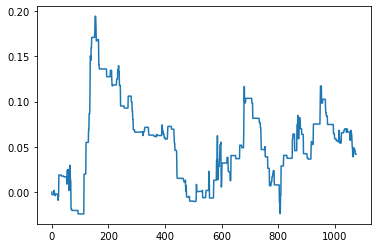

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1000
Num of lookback days:  20
Z score threshold:  1.5
Trading freq (%) =  13.289962825278812
IR =  -0.012278046194524238
Mean Return (bps) =  -0.6320298453898183


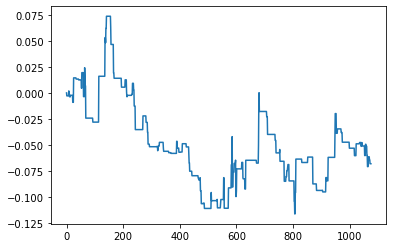

Signal time:  1000
Num of lookback days:  60
Z score threshold:  0.5
Trading freq (%) =  47.026022304832715
IR =  -0.015749505006083266
Mean Return (bps) =  -1.40211343017617


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


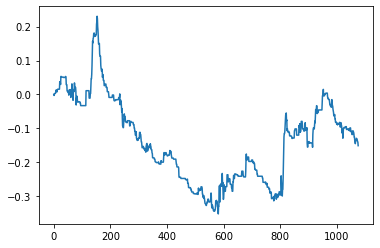

Signal time:  1000
Num of lookback days:  60
Z score threshold:  0.75
Trading freq (%) =  33.27137546468401
IR =  0.004427392024597396
Mean Return (bps) =  0.3398807609809032


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


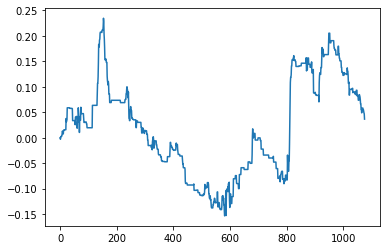

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1000
Num of lookback days:  60
Z score threshold:  1
Trading freq (%) =  22.769516728624538
IR =  0.01712134159652825
Mean Return (bps) =  1.1611330650420848


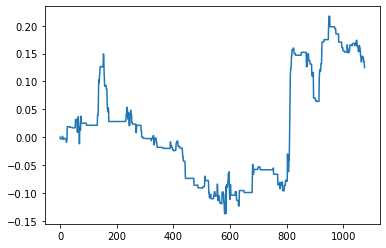

Signal time:  1000
Num of lookback days:  60
Z score threshold:  1.25
Trading freq (%) =  17.193308550185872
IR =  0.0022887432175932535
Mean Return (bps) =  0.12816327213244486


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


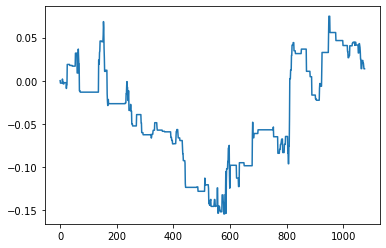

Signal time:  1000
Num of lookback days:  60
Z score threshold:  1.5
Trading freq (%) =  12.453531598513012
IR =  0.019613037255899985
Mean Return (bps) =  0.9634265581303227


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


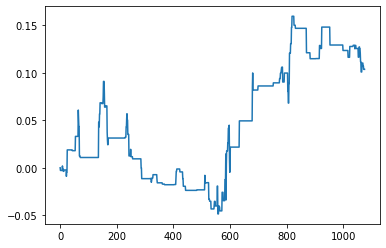

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1000
Num of lookback days:  120
Z score threshold:  0.5
Trading freq (%) =  42.37918215613383
IR =  -0.021920805596171343
Mean Return (bps) =  -1.8804953717436843


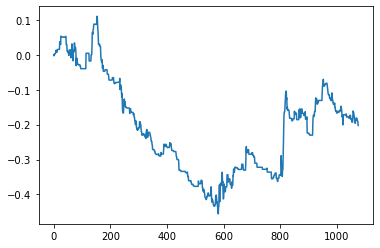

Signal time:  1000
Num of lookback days:  120
Z score threshold:  0.75
Trading freq (%) =  29.460966542750928
IR =  0.010878264427173571
Mean Return (bps) =  0.7960523400407334


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


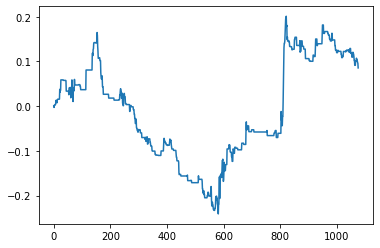

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1000
Num of lookback days:  120
Z score threshold:  1
Trading freq (%) =  18.587360594795538
IR =  0.034127247586304296
Mean Return (bps) =  2.1041658660787137


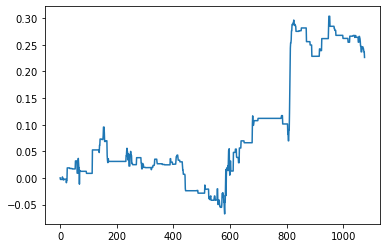

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1000
Num of lookback days:  120
Z score threshold:  1.25
Trading freq (%) =  13.940520446096654
IR =  0.008321604989419187
Mean Return (bps) =  0.458704403148427


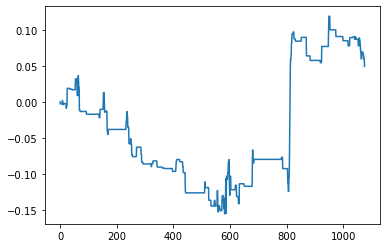

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1000
Num of lookback days:  120
Z score threshold:  1.5
Trading freq (%) =  10.408921933085502
IR =  -0.004000949304450004
Mean Return (bps) =  -0.1947715866871344


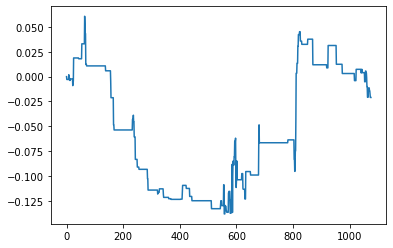

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1000
Num of lookback days:  250
Z score threshold:  0.5
Trading freq (%) =  38.56877323420074
IR =  -0.014194475481263458
Mean Return (bps) =  -1.1609060802708524


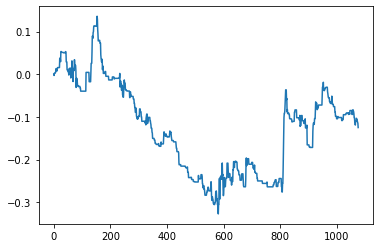

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1000
Num of lookback days:  250
Z score threshold:  0.75
Trading freq (%) =  24.25650557620818
IR =  0.020701553106213546
Mean Return (bps) =  1.3912107271676248


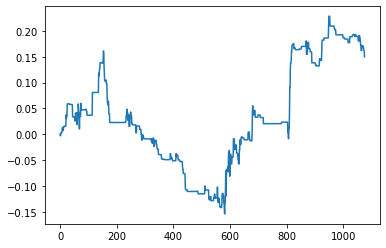

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1000
Num of lookback days:  250
Z score threshold:  1
Trading freq (%) =  17.007434944237918
IR =  0.011129250004304736
Mean Return (bps) =  0.6493558543432295


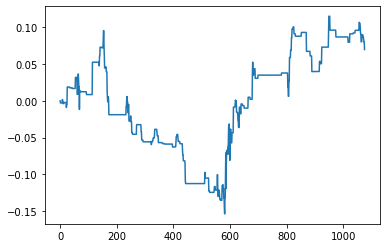

Signal time:  1000
Num of lookback days:  250
Z score threshold:  1.25
Trading freq (%) =  11.152416356877323
IR =  0.011571315699253173
Mean Return (bps) =  0.5719401660589024


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


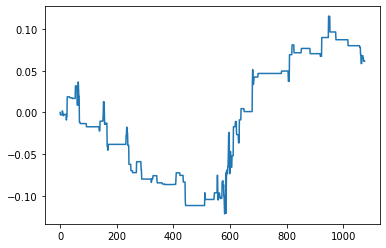

Signal time:  1000
Num of lookback days:  250
Z score threshold:  1.5
Trading freq (%) =  8.45724907063197
IR =  0.007205404789736602
Mean Return (bps) =  0.32742739507847335


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


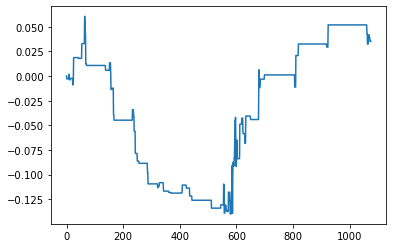

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  20
Z score threshold:  0.5
Trading freq (%) =  52.78810408921933
IR =  -0.044666803204954815
Mean Return (bps) =  -3.715574038765873


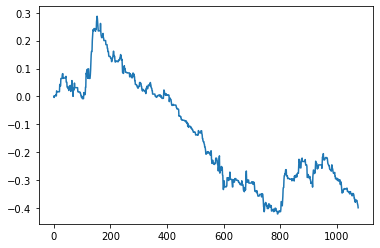

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  20
Z score threshold:  0.75
Trading freq (%) =  39.498141263940525
IR =  -0.036521051987976075
Mean Return (bps) =  -2.73886756602953


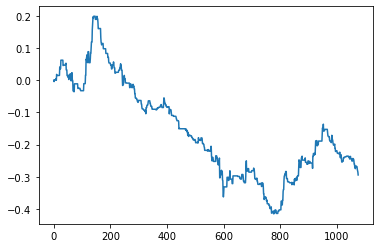

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  20
Z score threshold:  1
Trading freq (%) =  28.15985130111524
IR =  0.013245575536345507
Mean Return (bps) =  0.8470820409295297


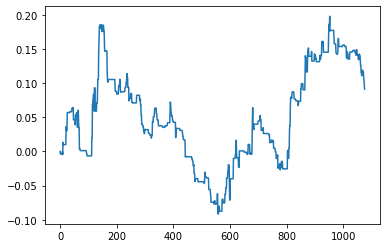

Signal time:  1030
Num of lookback days:  20
Z score threshold:  1.25
Trading freq (%) =  19.981412639405207
IR =  0.021953981436614204
Mean Return (bps) =  1.2240098116006801


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


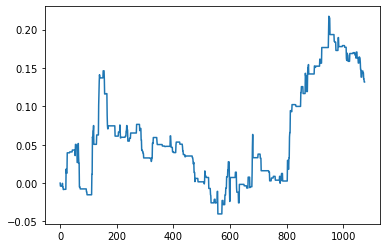

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  20
Z score threshold:  1.5
Trading freq (%) =  13.197026022304833
IR =  0.01581887325251299
Mean Return (bps) =  0.783969385609206


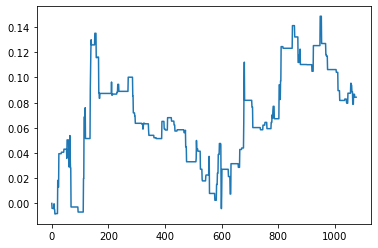

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  60
Z score threshold:  0.5
Trading freq (%) =  46.84014869888476
IR =  -0.018710425147369977
Mean Return (bps) =  -1.5621195975414615


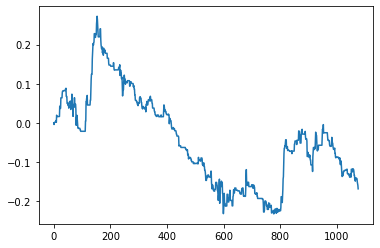

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  60
Z score threshold:  0.75
Trading freq (%) =  33.36431226765799
IR =  -0.010438951381775877
Mean Return (bps) =  -0.7614438988572845


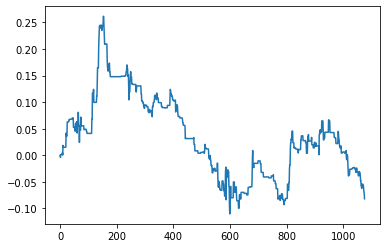

Signal time:  1030
Num of lookback days:  60
Z score threshold:  1
Trading freq (%) =  23.141263940520446
IR =  -0.011018608779683883
Mean Return (bps) =  -0.681283527270122


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


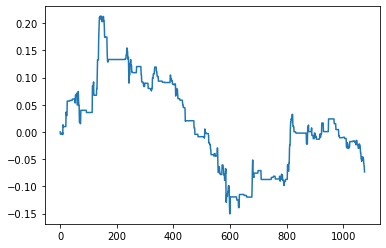

Signal time:  1030
Num of lookback days:  60
Z score threshold:  1.25
Trading freq (%) =  18.12267657992565
IR =  -0.010021212666879178
Mean Return (bps) =  -0.5448831151204052


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


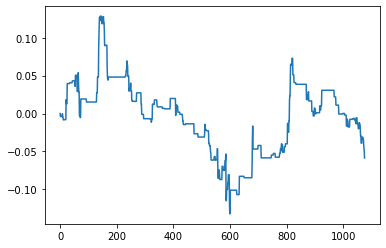

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  60
Z score threshold:  1.5
Trading freq (%) =  13.104089219330856
IR =  0.026733876035385244
Mean Return (bps) =  1.2249858084318126


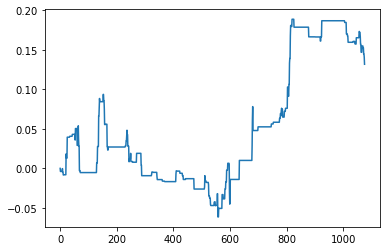

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  120
Z score threshold:  0.5
Trading freq (%) =  44.330855018587364
IR =  0.004855880661617733
Mean Return (bps) =  0.3951489271098201


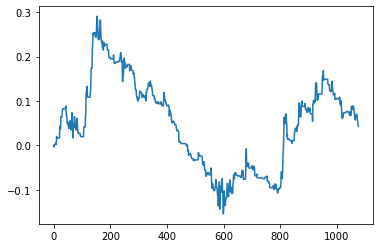

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  120
Z score threshold:  0.75
Trading freq (%) =  30.297397769516728
IR =  -0.0004414056277261223
Mean Return (bps) =  -0.03175945803528959


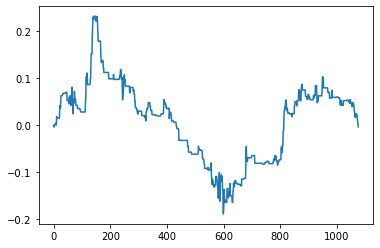

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  120
Z score threshold:  1
Trading freq (%) =  20.910780669144984
IR =  -0.006685528783192284
Mean Return (bps) =  -0.42859217070118816


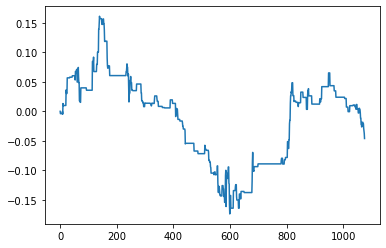

Signal time:  1030
Num of lookback days:  120
Z score threshold:  1.25
Trading freq (%) =  14.96282527881041
IR =  -0.0018236103505048222
Mean Return (bps) =  -0.10460649396314585


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


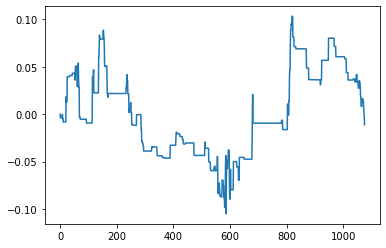

Signal time:  1030
Num of lookback days:  120
Z score threshold:  1.5
Trading freq (%) =  11.524163568773234
IR =  -0.021889706300840812
Mean Return (bps) =  -1.0217554433946245


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


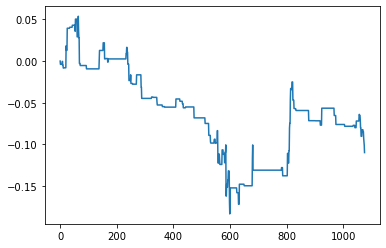

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  250
Z score threshold:  0.5
Trading freq (%) =  41.2639405204461
IR =  -0.007137634137796117
Mean Return (bps) =  -0.573479423884492


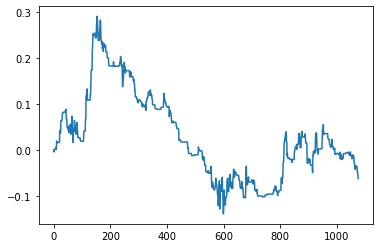

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  250
Z score threshold:  0.75
Trading freq (%) =  28.345724907063197
IR =  -0.0029985755529464727
Mean Return (bps) =  -0.21473762662738785


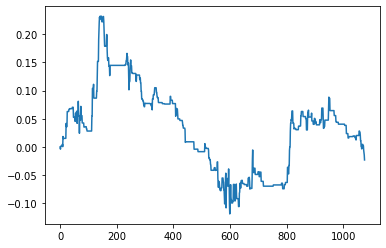

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  250
Z score threshold:  1
Trading freq (%) =  18.773234200743495
IR =  -0.006014682778734226
Mean Return (bps) =  -0.37852357400194375


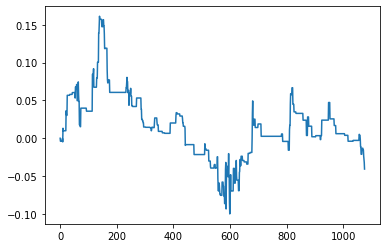

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1030
Num of lookback days:  250
Z score threshold:  1.25
Trading freq (%) =  13.104089219330856
IR =  0.008275243436846432
Mean Return (bps) =  0.4671484474754118


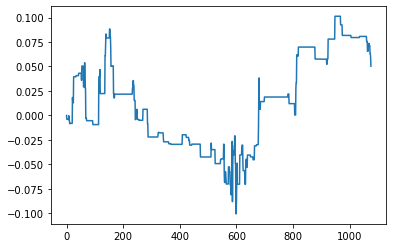

Signal time:  1030
Num of lookback days:  250
Z score threshold:  1.5
Trading freq (%) =  9.944237918215613
IR =  -0.002819302211201809
Mean Return (bps) =  -0.13541949025739855


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


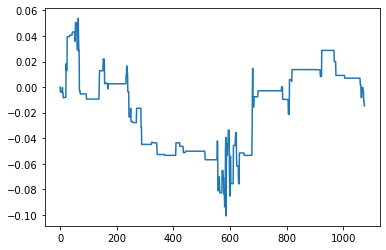

Signal time:  1100
Num of lookback days:  20
Z score threshold:  0.5
Trading freq (%) =  54.08921933085502
IR =  -0.11461270225002153
Mean Return (bps) =  -8.931335986327996


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


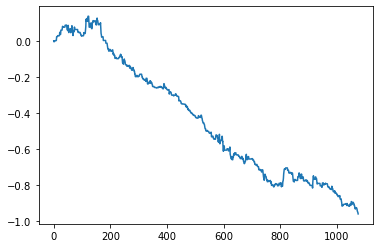

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1100
Num of lookback days:  20
Z score threshold:  0.75
Trading freq (%) =  38.38289962825279
IR =  -0.08529650038563003
Mean Return (bps) =  -5.953446686951371


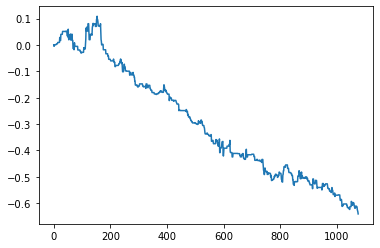

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1100
Num of lookback days:  20
Z score threshold:  1
Trading freq (%) =  28.624535315985128
IR =  -0.07563223783462567
Mean Return (bps) =  -4.491738430962226


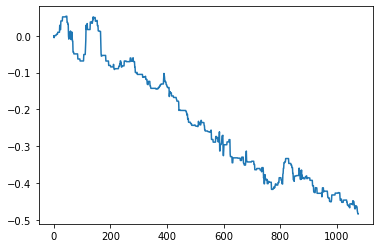

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1100
Num of lookback days:  20
Z score threshold:  1.25
Trading freq (%) =  19.516728624535315
IR =  -0.04295067537595919
Mean Return (bps) =  -2.0478052906089435


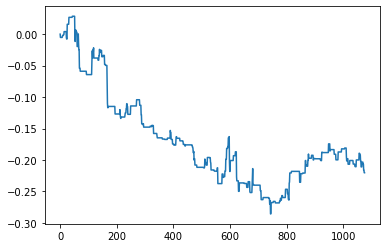

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1100
Num of lookback days:  20
Z score threshold:  1.5
Trading freq (%) =  13.661710037174721
IR =  -0.046473226834981556
Mean Return (bps) =  -1.8254249360459873


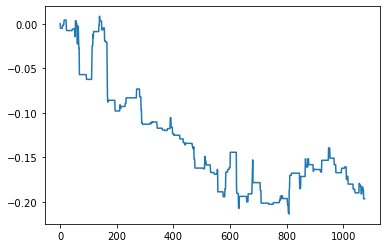

Signal time:  1100
Num of lookback days:  60
Z score threshold:  0.5
Trading freq (%) =  48.04832713754647
IR =  -0.08208286258840174
Mean Return (bps) =  -6.357470899622669


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


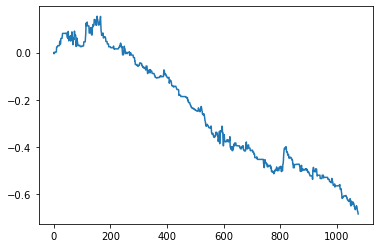

Signal time:  1100
Num of lookback days:  60
Z score threshold:  0.75
Trading freq (%) =  32.15613382899628
IR =  -0.07276251267730668
Mean Return (bps) =  -4.796665662150206


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


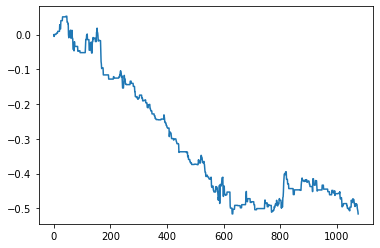

Signal time:  1100
Num of lookback days:  60
Z score threshold:  1
Trading freq (%) =  23.42007434944238
IR =  -0.06786457913438937
Mean Return (bps) =  -3.7013991553619685


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


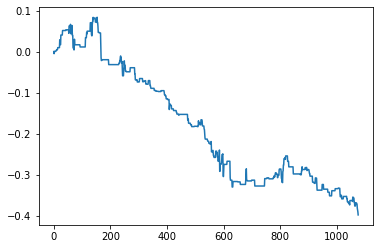

Signal time:  1100
Num of lookback days:  60
Z score threshold:  1.25
Trading freq (%) =  17.843866171003718
IR =  -0.04160341634634678
Mean Return (bps) =  -2.014210325530632


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


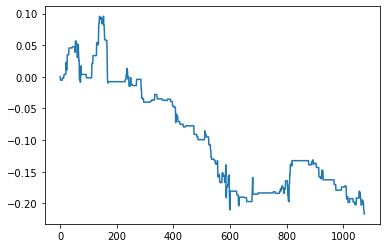

Signal time:  1100
Num of lookback days:  60
Z score threshold:  1.5
Trading freq (%) =  12.546468401486987
IR =  -0.02631387868119643
Mean Return (bps) =  -1.0341420566931971


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


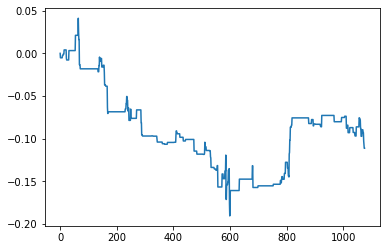

Signal time:  1100
Num of lookback days:  120
Z score threshold:  0.5
Trading freq (%) =  43.866171003717476
IR =  -0.07842924264365313
Mean Return (bps) =  -5.857134019458886


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


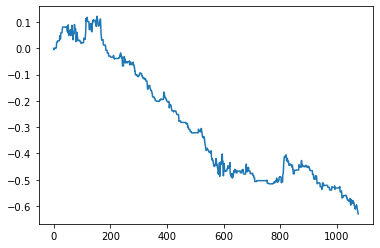

Signal time:  1100
Num of lookback days:  120
Z score threshold:  0.75
Trading freq (%) =  28.99628252788104
IR =  -0.0745221105468038
Mean Return (bps) =  -4.768440596036302


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


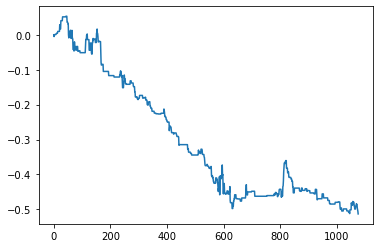

Signal time:  1100
Num of lookback days:  120
Z score threshold:  1
Trading freq (%) =  20.16728624535316
IR =  -0.04801322477871637
Mean Return (bps) =  -2.610667823996122


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


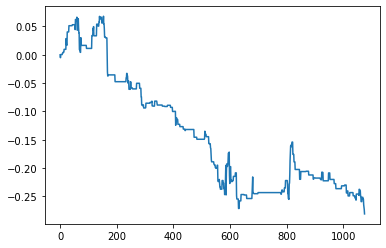

Signal time:  1100
Num of lookback days:  120
Z score threshold:  1.25
Trading freq (%) =  15.33457249070632
IR =  -0.043766933786280875
Mean Return (bps) =  -2.0938337654801202


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


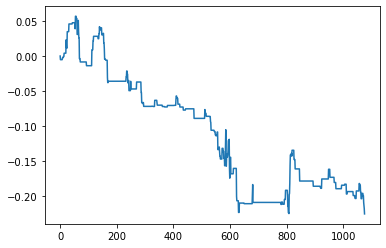

Signal time:  1100
Num of lookback days:  120
Z score threshold:  1.5
Trading freq (%) =  11.338289962825279
IR =  -0.020870479319022157
Mean Return (bps) =  -0.8246711469738668


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


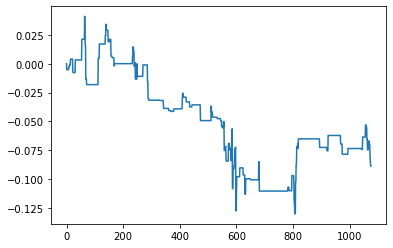

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1100
Num of lookback days:  250
Z score threshold:  0.5
Trading freq (%) =  39.498141263940525
IR =  -0.07085265459389734
Mean Return (bps) =  -5.223826722564125


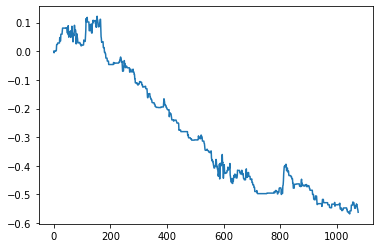

Signal time:  1100
Num of lookback days:  250
Z score threshold:  0.75
Trading freq (%) =  27.04460966542751
IR =  -0.06936398332552104
Mean Return (bps) =  -4.402910182922248


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


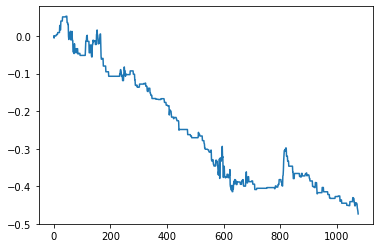

Signal time:  1100
Num of lookback days:  250
Z score threshold:  1


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Trading freq (%) =  18.773234200743495
IR =  -0.026511916363773168
Mean Return (bps) =  -1.4263777300406306


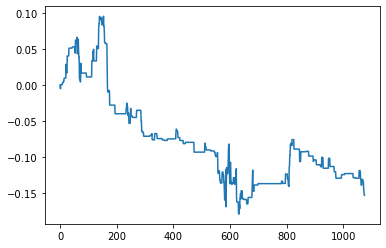

Signal time:  1100
Num of lookback days:  250
Z score threshold:  1.25
Trading freq (%) =  13.661710037174721
IR =  -0.01739036381851246
Mean Return (bps) =  -0.8188322713748938


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


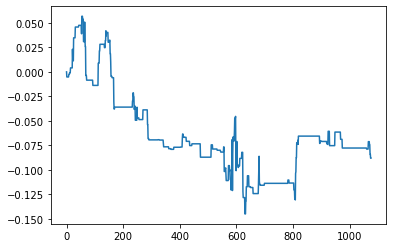

Signal time:  1100
Num of lookback days:  250
Z score threshold:  1.5
Trading freq (%) =  9.386617100371748
IR =  -0.011291941436577899
Mean Return (bps) =  -0.4822805084301906


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


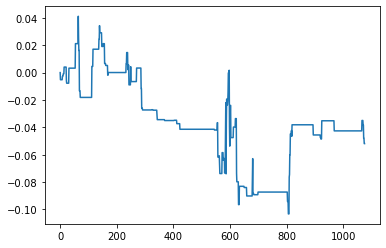

Signal time:  1130
Num of lookback days:  20
Z score threshold:  0.5
Trading freq (%) =  53.438661710037174
IR =  -0.15260021651293124
Mean Return (bps) =  -10.316198709559982


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


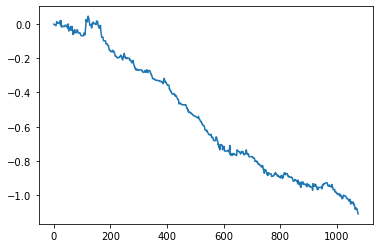

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1130
Num of lookback days:  20
Z score threshold:  0.75
Trading freq (%) =  38.56877323420074
IR =  -0.12814390949264243
Mean Return (bps) =  -7.61809429495599


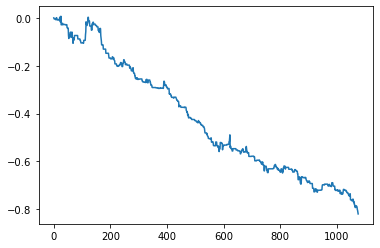

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1130
Num of lookback days:  20
Z score threshold:  1
Trading freq (%) =  26.858736059479554
IR =  -0.07053787904758411
Mean Return (bps) =  -3.567767943213465


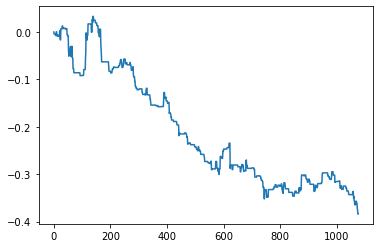

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1130
Num of lookback days:  20
Z score threshold:  1.25
Trading freq (%) =  20.910780669144984
IR =  -0.045392272250471544
Mean Return (bps) =  -2.148290546325192


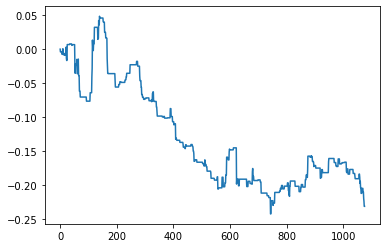

Signal time:  1130
Num of lookback days:  20
Z score threshold:  1.5
Trading freq (%) =  14.776951672862454
IR =  -0.038708748719956054
Mean Return (bps) =  -1.628846581797507


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


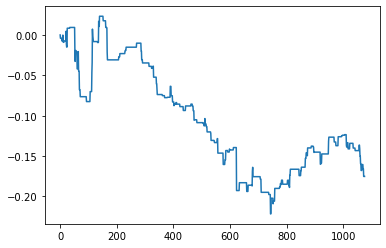

Signal time:  1130
Num of lookback days:  60
Z score threshold:  0.5
Trading freq (%) =  49.44237918215613
IR =  -0.11654460243425746
Mean Return (bps) =  -8.062405417821973


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


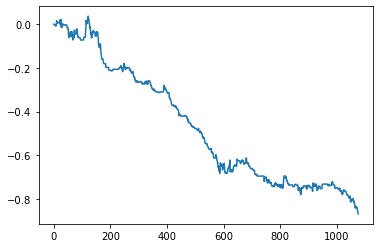

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1130
Num of lookback days:  60
Z score threshold:  0.75
Trading freq (%) =  33.457249070631974
IR =  -0.10597809513255908
Mean Return (bps) =  -6.311736810144314


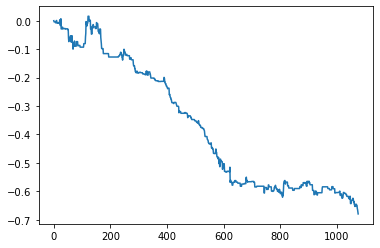

Signal time:  1130
Num of lookback days:  60
Z score threshold:  1
Trading freq (%) =  23.42007434944238
IR =  -0.0856071578992465
Mean Return (bps) =  -4.283129075663371


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


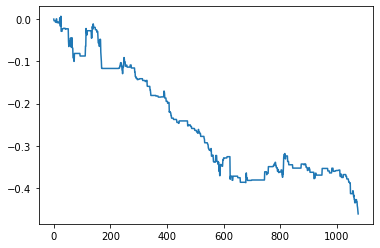

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1130
Num of lookback days:  60
Z score threshold:  1.25
Trading freq (%) =  18.773234200743495
IR =  -0.07754519345304653
Mean Return (bps) =  -3.3988644971778457


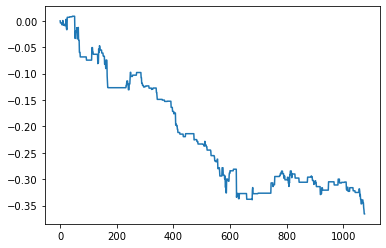

Signal time:  1130
Num of lookback days:  60
Z score threshold:  1.5
Trading freq (%) =  13.568773234200743
IR =  -0.06133013101008401
Mean Return (bps) =  -2.3929651186098897


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


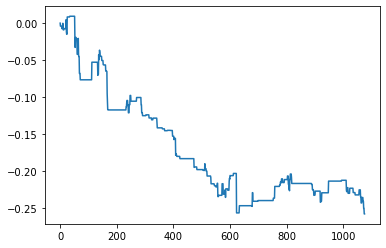

Signal time:  1130
Num of lookback days:  120
Z score threshold:  0.5
Trading freq (%) =  44.1449814126394
IR =  -0.11132112830141115
Mean Return (bps) =  -7.391209207680942


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


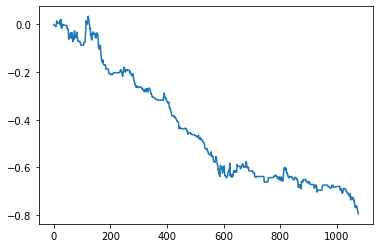

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1130
Num of lookback days:  120
Z score threshold:  0.75
Trading freq (%) =  30.297397769516728
IR =  -0.06937089948943025
Mean Return (bps) =  -4.0230394291188745


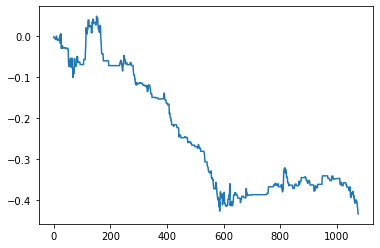

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1130
Num of lookback days:  120
Z score threshold:  1
Trading freq (%) =  21.654275092936803
IR =  -0.06140296290752472
Mean Return (bps) =  -3.1506340625485576


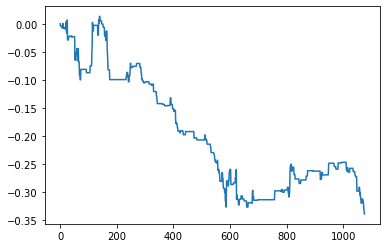

Signal time:  1130
Num of lookback days:  120
Z score threshold:  1.25
Trading freq (%) =  16.07806691449814
IR =  -0.06770767226249201
Mean Return (bps) =  -3.059383199763835


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


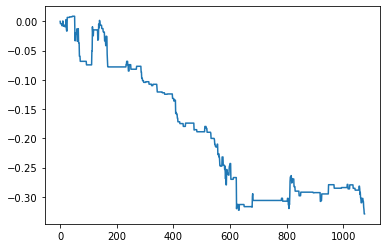

Signal time:  1130
Num of lookback days:  120
Z score threshold:  1.5
Trading freq (%) =  11.71003717472119
IR =  -0.06352634721348777
Mean Return (bps) =  -2.536367040543341


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


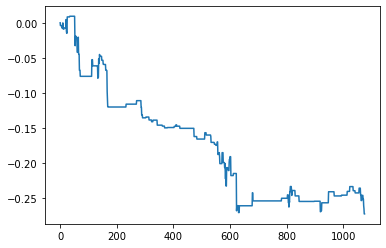

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1130
Num of lookback days:  250
Z score threshold:  0.5
Trading freq (%) =  39.869888475836426
IR =  -0.09937477068350664
Mean Return (bps) =  -6.440133810824753


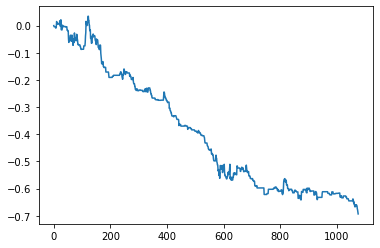

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1130
Num of lookback days:  250
Z score threshold:  0.75
Trading freq (%) =  28.15985130111524
IR =  -0.0635950640313268
Mean Return (bps) =  -3.7196731583576685


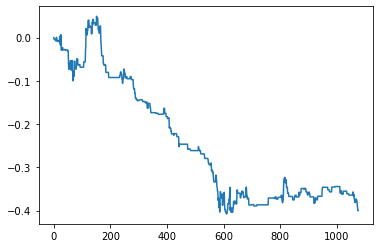

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1130
Num of lookback days:  250
Z score threshold:  1
Trading freq (%) =  19.702602230483272
IR =  -0.05842898966604693
Mean Return (bps) =  -2.924670910858098


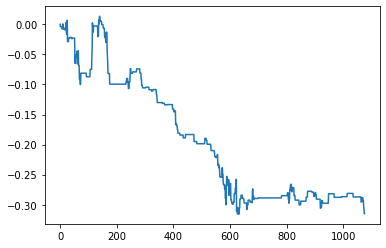

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1130
Num of lookback days:  250
Z score threshold:  1.25
Trading freq (%) =  14.219330855018589
IR =  -0.04110583704972952
Mean Return (bps) =  -1.8304554722588342


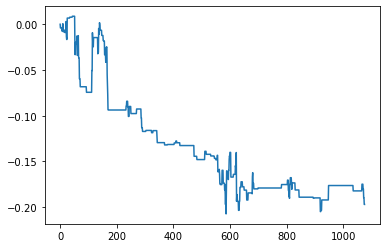

Signal time:  1130
Num of lookback days:  250
Z score threshold:  1.5
Trading freq (%) =  11.245353159851302
IR =  -0.05274741621189627
Mean Return (bps) =  -2.1554936620419443


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


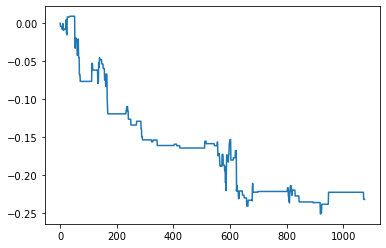

Signal time:  1330
Num of lookback days:  20
Z score threshold:  0.5
Trading freq (%) =  54.92565055762082
IR =  -0.1114404073074643
Mean Return (bps) =  -6.207128453573495


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


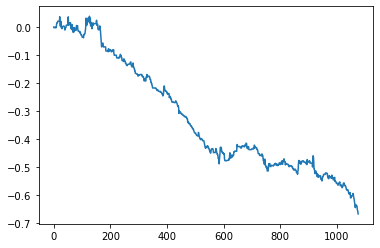

Signal time:  1330
Num of lookback days:  20
Z score threshold:  0.75
Trading freq (%) =  38.38289962825279
IR =  -0.06960604749645773
Mean Return (bps) =  -3.438746481526016


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


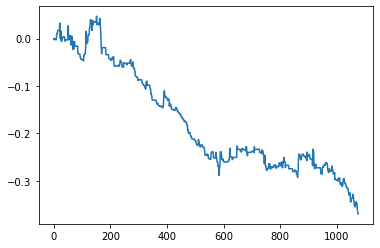

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  20
Z score threshold:  1
Trading freq (%) =  26.858736059479554
IR =  -0.07786552739248592
Mean Return (bps) =  -3.2781395302477323


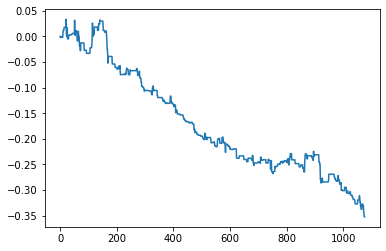

Signal time:  1330
Num of lookback days:  20
Z score threshold:  1.25
Trading freq (%) =  21.189591078066915
IR =  -0.06899569558711055
Mean Return (bps) =  -2.669935067913672


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


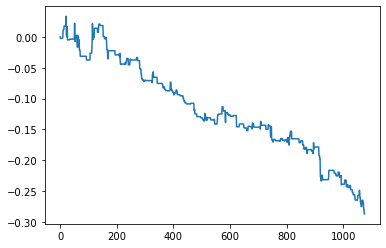

Signal time:  1330
Num of lookback days:  20
Z score threshold:  1.5
Trading freq (%) =  14.776951672862454
IR =  -0.05451051177227501
Mean Return (bps) =  -1.7972364624874881


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


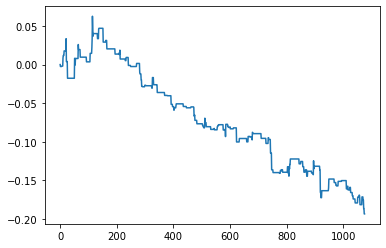

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  60
Z score threshold:  0.5
Trading freq (%) =  48.42007434944237
IR =  -0.09380251246060227
Mean Return (bps) =  -5.152853696859309


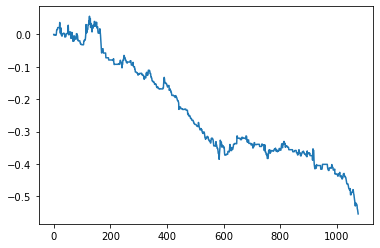

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  60
Z score threshold:  0.75
Trading freq (%) =  35.594795539033456
IR =  -0.08110159491495383
Mean Return (bps) =  -3.8567520738984724


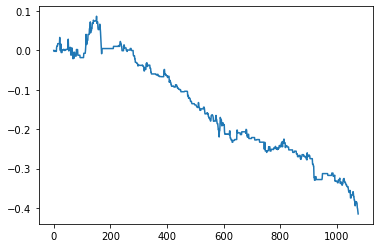

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  60
Z score threshold:  1
Trading freq (%) =  24.907063197026023
IR =  -0.08015461464924162
Mean Return (bps) =  -3.2227316662387926


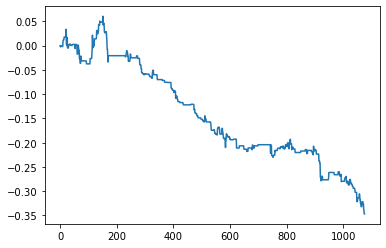

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  60
Z score threshold:  1.25
Trading freq (%) =  17.843866171003718
IR =  -0.0714953446547922
Mean Return (bps) =  -2.451902282947079


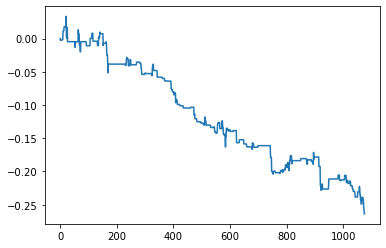

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  60
Z score threshold:  1.5
Trading freq (%) =  13.197026022304833
IR =  -0.05565965637626725
Mean Return (bps) =  -1.6604040189790679


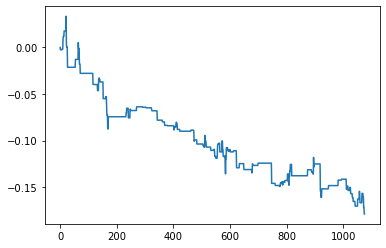

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  120
Z score threshold:  0.5
Trading freq (%) =  46.18959107806692
IR =  -0.09124132787969448
Mean Return (bps) =  -4.843305624609032


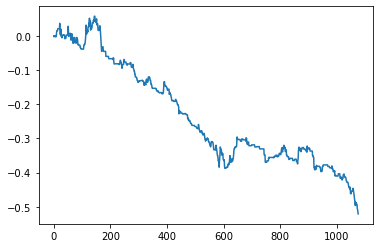

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  120
Z score threshold:  0.75
Trading freq (%) =  31.412639405204462
IR =  -0.07009729636917028
Mean Return (bps) =  -3.2717424467691782


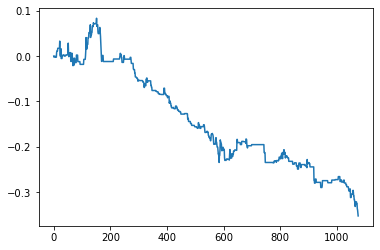

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  120
Z score threshold:  1
Trading freq (%) =  22.02602230483271
IR =  -0.07385526517332625
Mean Return (bps) =  -2.8242806037549975


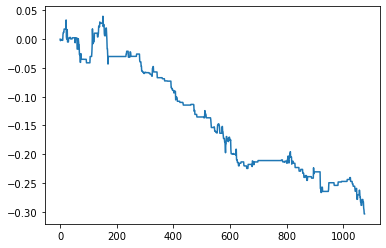

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  120
Z score threshold:  1.25
Trading freq (%) =  15.520446096654275
IR =  -0.046107724738211266
Mean Return (bps) =  -1.5214592100025572


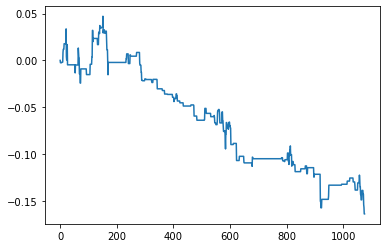

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  120
Z score threshold:  1.5
Trading freq (%) =  10.687732342007434
IR =  -0.05045778736849786
Mean Return (bps) =  -1.4144431642743824


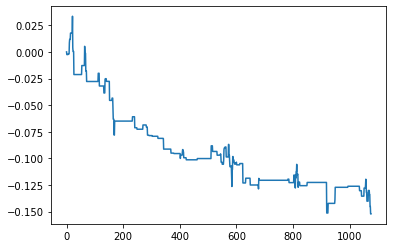

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  250
Z score threshold:  0.5
Trading freq (%) =  41.91449814126394
IR =  -0.0701674335772192
Mean Return (bps) =  -3.9258707283670926


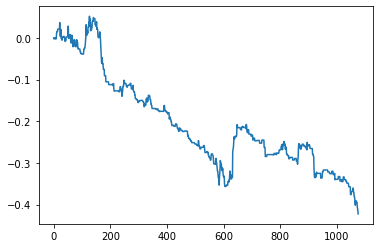

Signal time:  1330
Num of lookback days:  250
Z score threshold:  0.75
Trading freq (%) =  27.881040892193308
IR =  -0.0585963888676637
Mean Return (bps) =  -2.6870410738730257


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


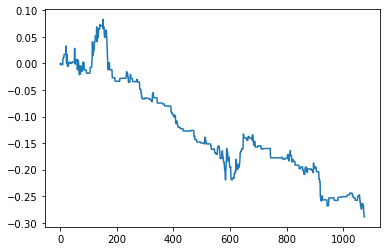

Signal time:  1330
Num of lookback days:  250
Z score threshold:  1
Trading freq (%) =  19.981412639405207
IR =  -0.03707247549259277
Mean Return (bps) =  -1.4606603393458366


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


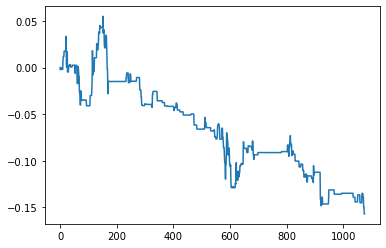

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  250
Z score threshold:  1.25
Trading freq (%) =  14.312267657992564
IR =  -0.02388963672613994
Mean Return (bps) =  -0.7938813052561755


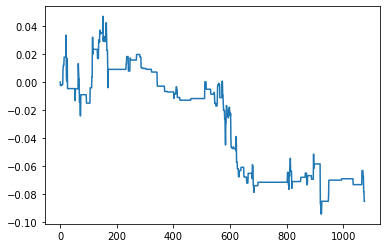

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1330
Num of lookback days:  250
Z score threshold:  1.5
Trading freq (%) =  9.386617100371748
IR =  -0.047218819697157424
Mean Return (bps) =  -1.314932753427476


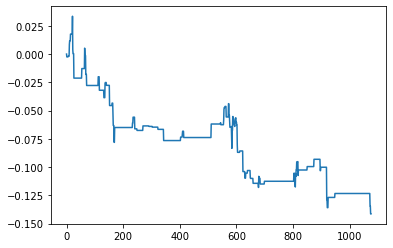

Signal time:  1400
Num of lookback days:  20
Z score threshold:  0.5
Trading freq (%) =  56.226765799256505
IR =  -0.44845121408985616
Mean Return (bps) =  -13.344015615159929


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


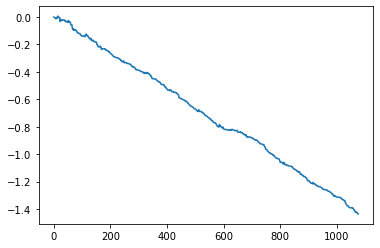

Signal time:  1400
Num of lookback days:  20
Z score threshold:  0.75
Trading freq (%) =  40.89219330855018
IR =  -0.34512034479425435
Mean Return (bps) =  -9.551138129955344


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


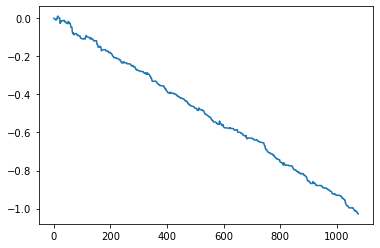

Signal time:  1400
Num of lookback days:  20
Z score threshold:  1
Trading freq (%) =  29.83271375464684
IR =  -0.263851234582342
Mean Return (bps) =  -6.46353045469455


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


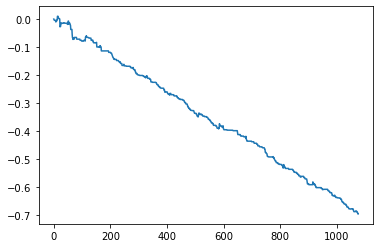

Signal time:  1400
Num of lookback days:  20
Z score threshold:  1.25
Trading freq (%) =  20.53903345724907
IR =  -0.20574955417865548
Mean Return (bps) =  -4.491020570454389


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


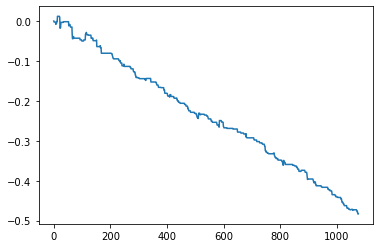

Signal time:  1400
Num of lookback days:  20
Z score threshold:  1.5
Trading freq (%) =  13.382899628252787
IR =  -0.14593771119119528
Mean Return (bps) =  -2.7379059723967702


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


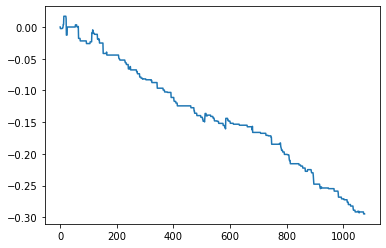

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1400
Num of lookback days:  60
Z score threshold:  0.5
Trading freq (%) =  52.04460966542751
IR =  -0.4082621389070084
Mean Return (bps) =  -11.999625512339273


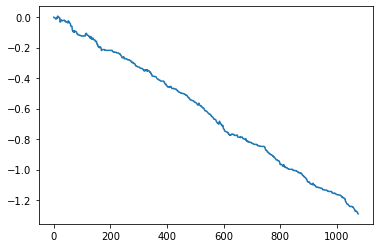

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1400
Num of lookback days:  60
Z score threshold:  0.75
Trading freq (%) =  37.54646840148699
IR =  -0.3313416592198329
Mean Return (bps) =  -8.8592779294836


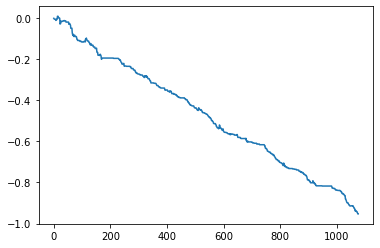

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1400
Num of lookback days:  60
Z score threshold:  1
Trading freq (%) =  25.27881040892193
IR =  -0.235411726875861
Mean Return (bps) =  -5.688128196484908


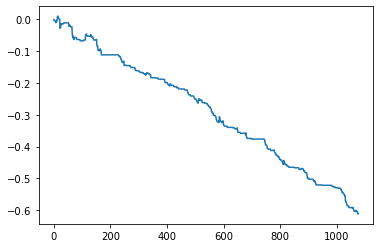

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1400
Num of lookback days:  60
Z score threshold:  1.25
Trading freq (%) =  17.936802973977695
IR =  -0.172279086185264
Mean Return (bps) =  -3.7957531580000854


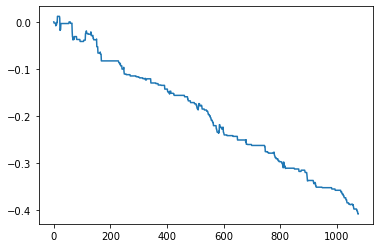

Signal time:  1400
Num of lookback days:  60
Z score threshold:  1.5
Trading freq (%) =  13.289962825278812
IR =  -0.13854222410455094
Mean Return (bps) =  -2.790276455488674


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


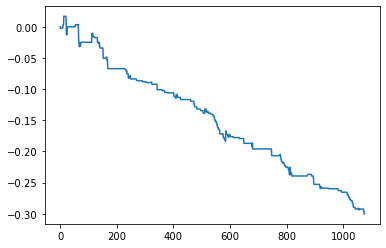

Signal time:  1400
Num of lookback days:  120
Z score threshold:  0.5
Trading freq (%) =  47.76951672862453
IR =  -0.38191518290135834
Mean Return (bps) =  -10.984093707409821


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


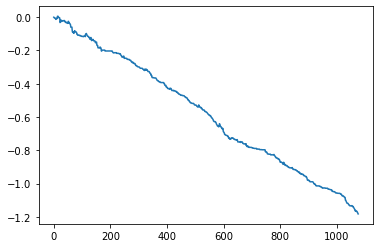

Signal time:  1400
Num of lookback days:  120
Z score threshold:  0.75
Trading freq (%) =  31.970260223048324
IR =  -0.2755348575714038
Mean Return (bps) =  -7.035293571814988


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


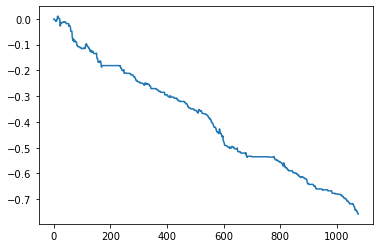

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1400
Num of lookback days:  120
Z score threshold:  1
Trading freq (%) =  22.304832713754646
IR =  -0.20434113762604603
Mean Return (bps) =  -4.739193109538171


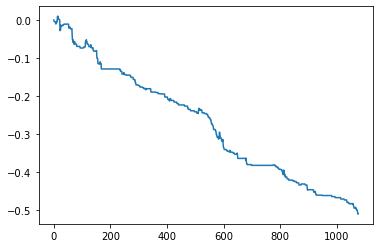

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1400
Num of lookback days:  120
Z score threshold:  1.25
Trading freq (%) =  15.613382899628252
IR =  -0.15060858215760592
Mean Return (bps) =  -3.205722970504959


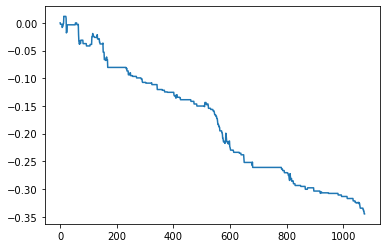

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1400
Num of lookback days:  120
Z score threshold:  1.5
Trading freq (%) =  11.524163568773234
IR =  -0.11219734589816878
Mean Return (bps) =  -2.2312627126347477


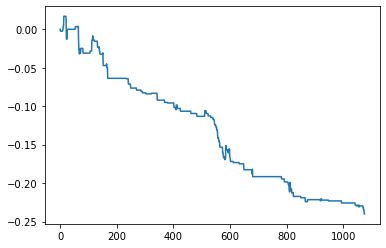

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1400
Num of lookback days:  250
Z score threshold:  0.5
Trading freq (%) =  43.49442379182156
IR =  -0.34397066693804834
Mean Return (bps) =  -9.785279042645394


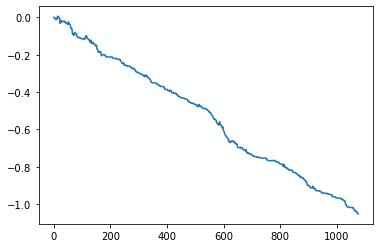

<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


Signal time:  1400
Num of lookback days:  250
Z score threshold:  0.75
Trading freq (%) =  28.810408921933085
IR =  -0.25097599141623933
Mean Return (bps) =  -6.322123842264984


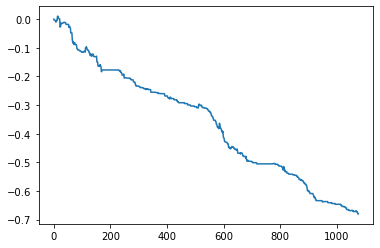

Signal time:  1400
Num of lookback days:  250
Z score threshold:  1
Trading freq (%) =  19.981412639405207
IR =  -0.18539938289018204
Mean Return (bps) =  -4.2678423037842705


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


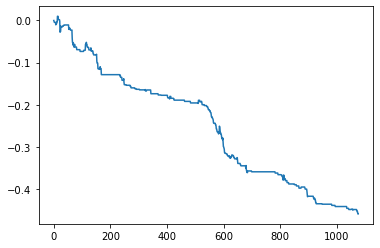

Signal time:  1400
Num of lookback days:  250
Z score threshold:  1.25
Trading freq (%) =  15.427509293680297
IR =  -0.14800463947267375
Mean Return (bps) =  -3.1928478462484238


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


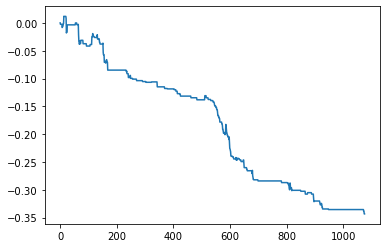

Signal time:  1400
Num of lookback days:  250
Z score threshold:  1.5
Trading freq (%) =  10.50185873605948
IR =  -0.09577297411989047
Mean Return (bps) =  -1.887970375443955


<ipython-input-65-1baf98fefcd4>:10: RuntimeWarning: invalid value encountered in true_divide
  z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)


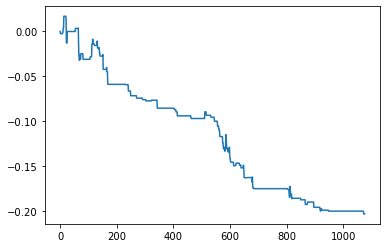

In [65]:
for signal_time in [930, 1000, 1030, 1100, 1130, 1330, 1400]:
    signal_return_df = close_df[signal_time]/ close_df[1500].shift(1) - 1
    signal_return_m = signal_return_df.values[:,np.newaxis]
    for lookback_days in [20, 60, 120, 250]:
        for z_score_threshold in [0.5, 0.75, 1, 1.25, 1.5]:
            print('Signal time: ', signal_time)
            print('Num of lookback days: ', lookback_days)
            print('Z score threshold: ', z_score_threshold)
            
            z_score_v = (signal_return_m - tsOp.movingAverage(signal_return_m, lookback_days))/ np.power(tsOp.movingVariance(signal_return_m, lookback_days), 0.5)
            z_score_v = z_score_v.flatten()
            alpha_v = np.sign(signal_return_df).values
            alpha_v[np.bitwise_and(alpha_v > 0, z_score_v < z_score_threshold)] = 0
            alpha_v[np.bitwise_and(alpha_v < 0, z_score_v > -z_score_threshold)] = 0
            
            idx = valid_time.index(signal_time)
            trade_time = valid_time[idx + 1]
            realized_return_df = close_df[1500]/ close_df[trade_time] - 1

            trading_cost = 0.0025
            pnl_v = alpha_v * realized_return_df.values - np.fabs(alpha_v) * trading_cost
            pnl_v[~np.isfinite(pnl_v)] = 0
            print('Trading freq (%) = ', np.sum(np.fabs(alpha_v) > 0)/ len(alpha_v) * 100)
            print('IR = ', np.nanmean(pnl_v)/ np.nanstd(pnl_v))
            print('Mean Return (bps) = ', np.nanmean(pnl_v) * 1e4)
            plt.plot(np.cumsum(pnl_v))
            plt.show()